In [103]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
from scipy import signal
from scipy.fftpack import fft

import pandas as pd
import os

ACITIVITIES POSSIBLE:
- walking,
- walking upstairs,
- walking downstairs,
- sitting,
- standing,
- laying

SENSORS: (3 SENSORS -> 9)
- three-axial linear body acceleration (ab_x, ab_y, ab_z)
- three-axial linear total acceleration (a_x, a_y, a_z)
- three-axial angular velocity (w_x, w_y, w_z)

DATASET:


In [104]:
def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()        # returns a 'list' of data
        data = map(lambda x: x.rstrip().lstrip().split(), data) # pass each item of list to the function,
        # function is defined by this anonymous lambda function, which removes spaces
        
        data = [list(map(float, line)) for line in data] # convert string list to float list
        data = np.array(data, dtype=np.float32) # make a numpy array out of the float list
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return np.array(activities)


In [105]:
pwd

'/Users/utkarshtripathi/Documents/PlatformIO/Projects'

In [106]:

INPUT_FOLDER_TRAIN = './Available_Datasets/UCI_HAR/train/Inertial_Signals/' 
INPUT_FOLDER_TEST =  './Available_Datasets/UCI_HAR/test/Inertial_Signals/'

# File names to get data from
INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
 
INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

In [107]:
train_signals, test_signals = [], []

for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)

train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)

test_signals = np.transpose(np.array(test_signals), (1, 2, 0))


In [108]:
LABELFILE_TRAIN = './Available_Datasets/UCI_HAR/train/y_train.txt'
LABELFILE_TEST = './Available_Datasets/UCI_HAR/test/y_test.txt'
train_labels = read_labels(LABELFILE_TRAIN)
test_labels  = read_labels(LABELFILE_TEST)

In [109]:
def get_values(y_values, T, N, f_s):
    y_values = y_values
    x_values = [sample_rate * kk for kk in range(0,len(y_values))]
    return x_values, y_values

In [111]:
# PLOTTING SIGNALS

(256000,)


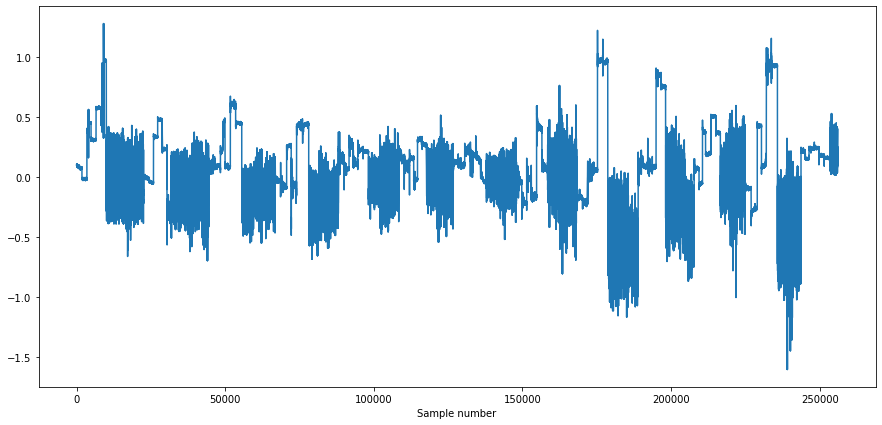

In [140]:
# sig = np.array( train_signals[0, :, :] )
# Getting Sensor-1 data and plotting

i=0
sigX = np.array([])

for i in range(0,2000): # take data for one sensor (can be upto 7352 (==rows))
    s = train_signals[i, :, 8]
    sigX = np.append(sigX, s)

print(sigX.shape)
fig1 = plt.figure()

plt.plot(sigX)
plt.xlabel('Sample number')
fig1.set_size_inches(w=15,h=7)
